# **Lab Assessment**
### Q1- For the given insurance dataset justify the hypothesis
1.	Does bmi of males differ significantly from that of females?
2.	Is the proportion of smokers significantly different in different genders?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [7]:
insurance_data=pd.read_csv('insurance (1).csv')
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
insurance_data.shape

(1338, 7)

In [9]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


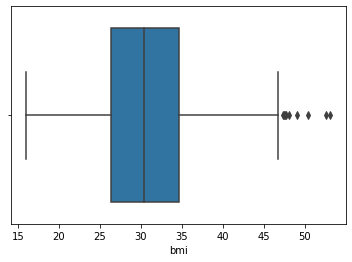

In [12]:
sns.boxplot(insurance_data['bmi'])

In [13]:
Q1 = np.percentile(insurance_data['bmi'], 25)
Q3 = np.percentile(insurance_data['bmi'], 75)
IQR = Q3 - Q1

bmi_out = [x for x in insurance_data['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for bmi:', len(bmi_out))

Identified outliers for bmi: 9


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


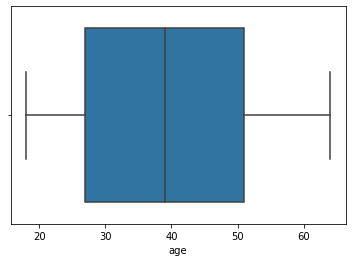

In [14]:
sns.boxplot(insurance_data['age'])

In [15]:
Q1 = np.percentile(insurance_data['age'], 25)
Q3 = np.percentile(insurance_data['age'], 75)
IQR = Q3 - Q1

age_out = [x for x in insurance_data['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for age:', len(age_out))

Identified outliers for age: 0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


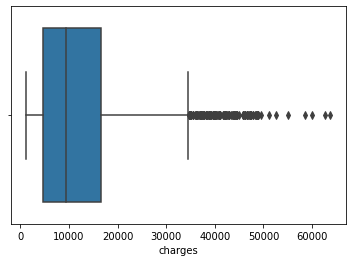

In [16]:
sns.boxplot(insurance_data['charges'])

In [17]:
Q1 = np.percentile(insurance_data['charges'], 25)
Q3 = np.percentile(insurance_data['charges'], 75)
IQR = Q3 - Q1

charges_out = [x for x in insurance_data['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for charges:', len(charges_out))

Identified outliers for charges: 139


In [18]:
Skew = pd.DataFrame({'Skewness Value' : [stats.skew(insurance_data.bmi), stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                    index=['bmi','age','charges'])
Skew

Skewness Value
bmi            0.283729
age            0.055610
charges        1.514180

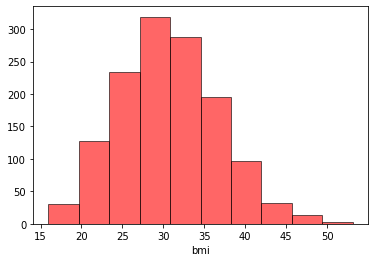

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


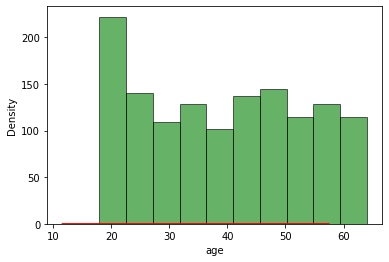

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


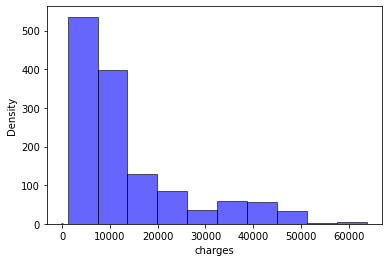

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


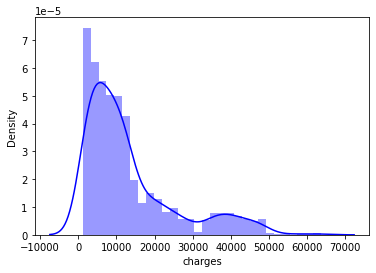

In [19]:
plt.hist(insurance_data['bmi'], color= 'red', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(insurance_data['bmi'], color= 'red')

plt.hist(insurance_data['age'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(insurance_data['age'], color= 'green')


plt.hist(insurance_data['charges'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.distplot(insurance_data['charges'], color= 'blue')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


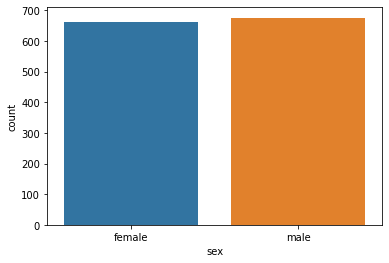

In [20]:
sns.countplot(insurance_data['sex'])

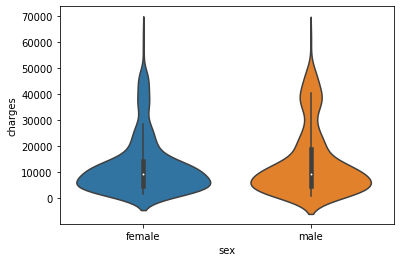

In [21]:
sns.violinplot(y='charges', x='sex', data=insurance_data, split=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


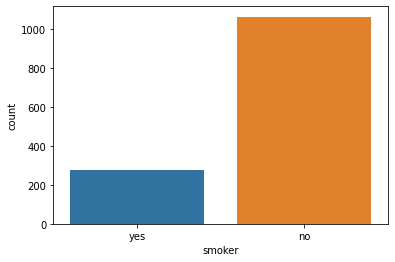

In [22]:
sns.countplot(insurance_data['smoker'])

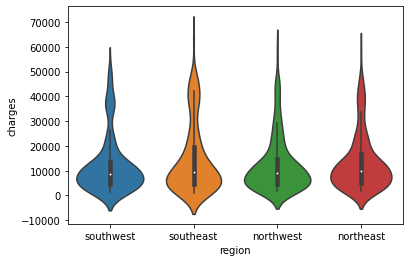

In [23]:
sns.violinplot(y='charges', x='region', data=insurance_data, split=True)

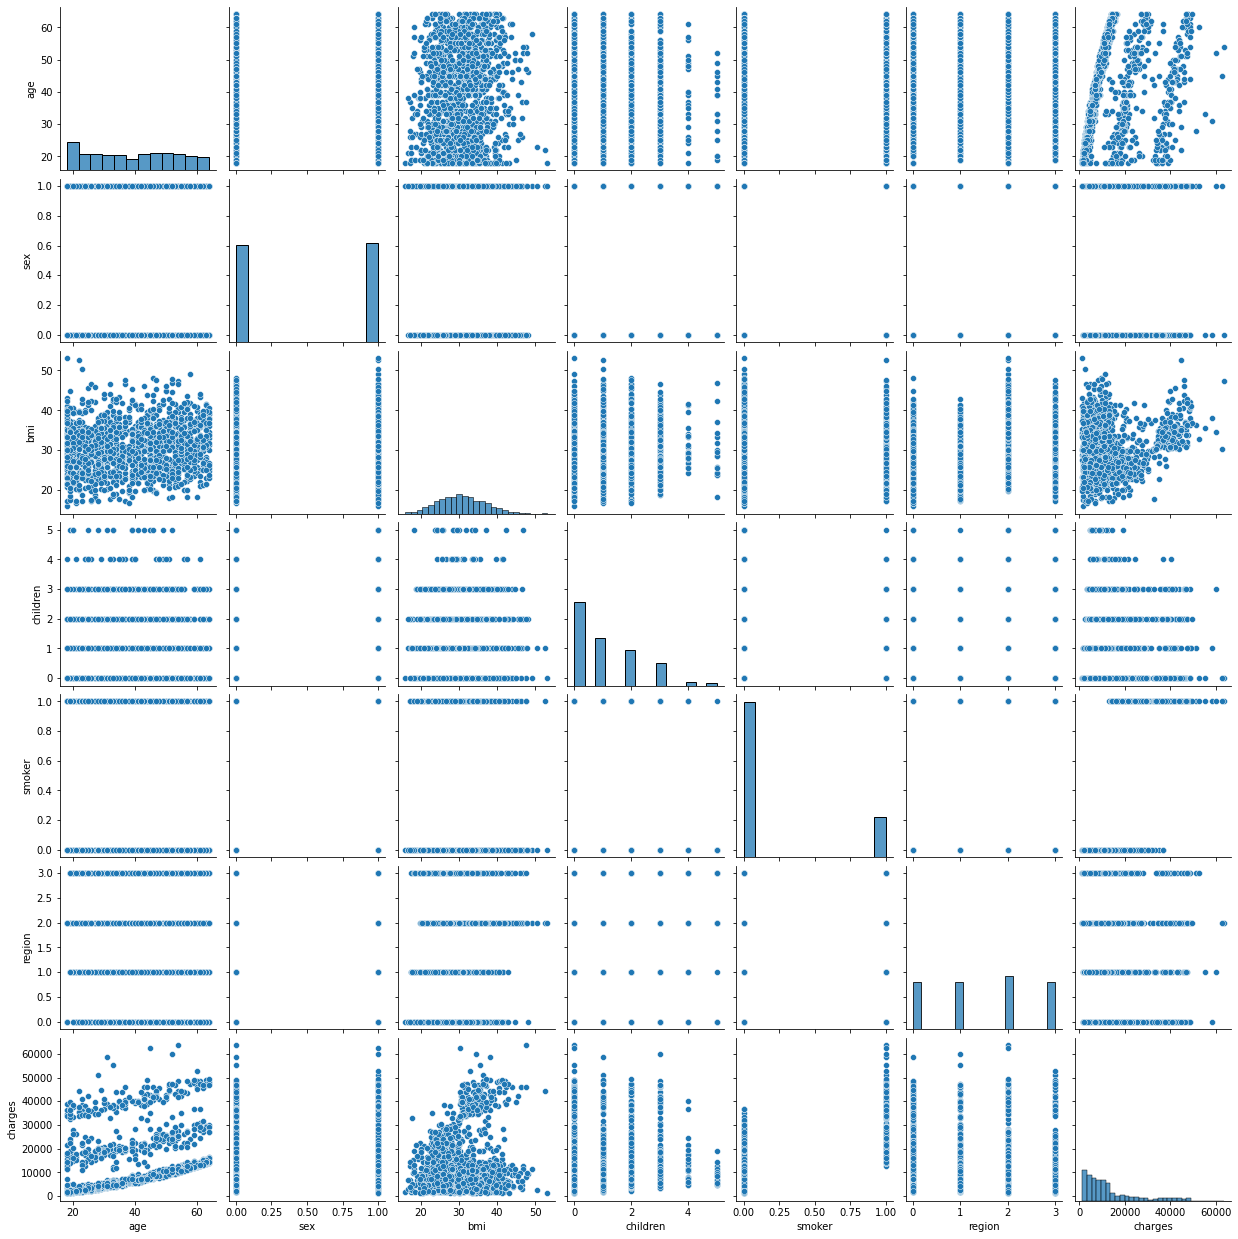

In [24]:
insurance_data_copy = insurance_data.copy()

insurance_data_copy.loc[:,['sex', 'smoker', 'region']] = insurance_data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

sns.pairplot(insurance_data_copy)
plt.show()

In [25]:
insurance_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you

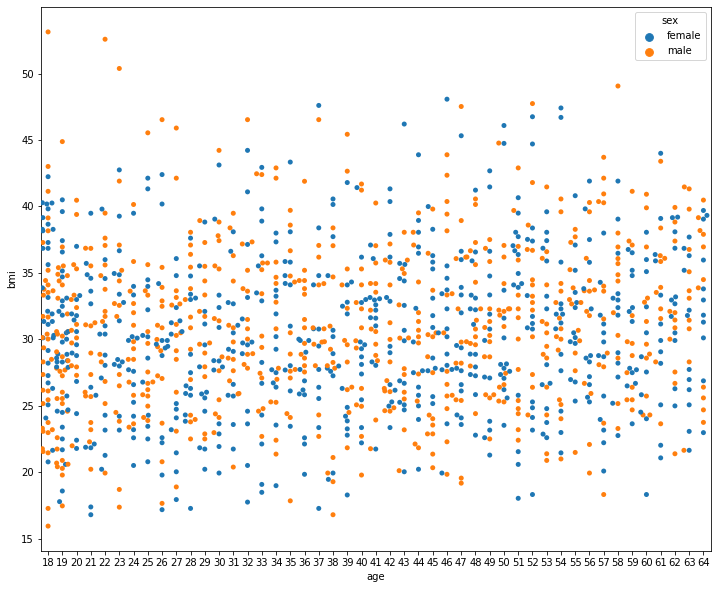

In [26]:
#swarm plot
plt.figure(figsize=(12,10))
sns.swarmplot(y='bmi',x='age',hue='sex',data=insurance_data)
plt.show()

In [27]:
H0 = "bmi of males does not differ significantly from females"   
H1 = "bmi of males differ significantly from females"   

x = np.array(insurance_data[insurance_data.sex == 'male'].bmi)  
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Conclusion: Accepting Null hypothesis as the p-value is greater than 0.05. Hence, BMI does not change significantly on basis of gender.

In [28]:
H0 = "Gender has no effect on smoking habits" 
H1 = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(insurance_data['sex'],insurance_data['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.006548143503580696


Conclusion: Rejecting Null hypothesis as the p-value is less than 0.05. So, smoking habits differs from gender to gender.

## Q2-
### 1. Create portfolio for the given stocks:  'GLD', 'AMZN' for the last 10 years.
### 2. Visualize the expected returns on the 10 years series.
### 3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.
### 4. Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.


In [29]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = pdr.get_data_yahoo("GLD AMZN", start="2013-01-12", end="2023-01-12")
print(df)

[*********************100%***********************]  2 of 2 completed
            Adj Close                  Close                   High  \
                 AMZN         GLD       AMZN         GLD       AMZN   
Date                                                                  
2013-01-14  13.636500  161.539993  13.636500  161.539993  13.713000   
2013-01-15  13.595000  162.559998  13.595000  162.559998  13.636500   
2013-01-16  13.446500  162.649994  13.446500  162.649994  13.562000   
2013-01-17  13.524000  163.350006  13.524000  163.350006  13.598500   
2013-01-18  13.606000  163.089996  13.606000  163.089996  13.725000   
...               ...         ...        ...         ...        ...   
2023-01-05  83.120003  170.520004  83.120003  170.520004  85.419998   
2023-01-06  86.080002  173.710007  86.080002  173.710007  86.400002   
2023-01-09  87.360001  174.100006  87.360001  174.100006  89.480003   
2023-01-10  89.870003  174.740005  89.870003  174.740005  90.190002   
2023-01-

In [30]:
stock_data = df['Adj Close']
stock_data.head()

AMZN         GLD
Date                           
2013-01-14  13.6365  161.539993
2013-01-15  13.5950  162.559998
2013-01-16  13.4465  162.649994
2013-01-17  13.5240  163.350006
2013-01-18  13.6060  163.089996

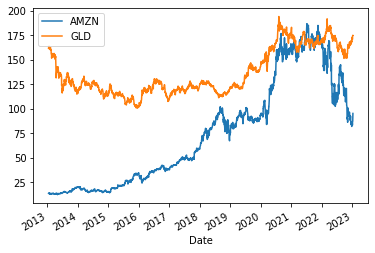

In [31]:
stock_data.plot()

In [32]:
stock_data1 = stock_data.pct_change().apply(lambda x: np.log(1+x))
stock_data1.head()

AMZN       GLD
Date                          
2013-01-14       NaN       NaN
2013-01-15 -0.003048  0.006294
2013-01-16 -0.010983  0.000553
2013-01-17  0.005747  0.004295
2013-01-18  0.006045 -0.001593

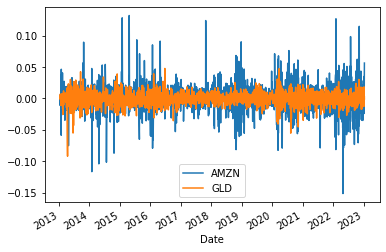

In [33]:
stock_data1.plot()

In [34]:
stock_data1.mean() #daily average return

AMZN    0.000772
GLD     0.000031
dtype: float64

In [35]:
stock_data1.mean() * 250 #annual average return

AMZN    0.192972
GLD     0.007736
dtype: float64

In [36]:
stock_data1.std() #Daily standard mean

AMZN    0.020554
GLD     0.009538
dtype: float64

In [37]:
Sharpe_Ratio = stock_data1.mean().mean() / stock_data1.mean().std()
Sharpe_Ratio

0.7661717876457809

In [38]:
stock_data1['GLD'].cov(stock_data1['AMZN'])

4.34716391966087e-06

In [39]:
stock_data1.corr()

AMZN       GLD
AMZN  1.000000  0.022174
GLD   0.022174  1.000000

In [40]:
ind_er = stock_data.resample('Y').last().pct_change().mean()
ind_er

AMZN    0.256187
GLD     0.046727
dtype: float64

In [41]:
ann_sd = stock_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AMZN    0.324984
GLD     0.150813
dtype: float64

In [42]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
AMZN  0.256187    0.324984
GLD   0.046727    0.150813

In [43]:
p_ret = [] 
p_vol = []
p_weights = []
num_assets = len(stock_data.columns)
num_portfolios = 10000

In [44]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights 
    p_ret.append(returns)
    var = stock_data1.corr().mul(weights, axis=0).mul(weights, axis=1).sum().sum()  #Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [45]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [46]:
for counter, symbol in enumerate(stock_data.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [47]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

Returns  Volatility  AMZN weight  GLD weight
0  0.133594   11.459823     0.414719    0.585281
1  0.094405   12.807966     0.227622    0.772378
2  0.112738   12.019903     0.315148    0.684852
3  0.092618   12.897754     0.219090    0.780910
4  0.178970   11.670769     0.631350    0.368650

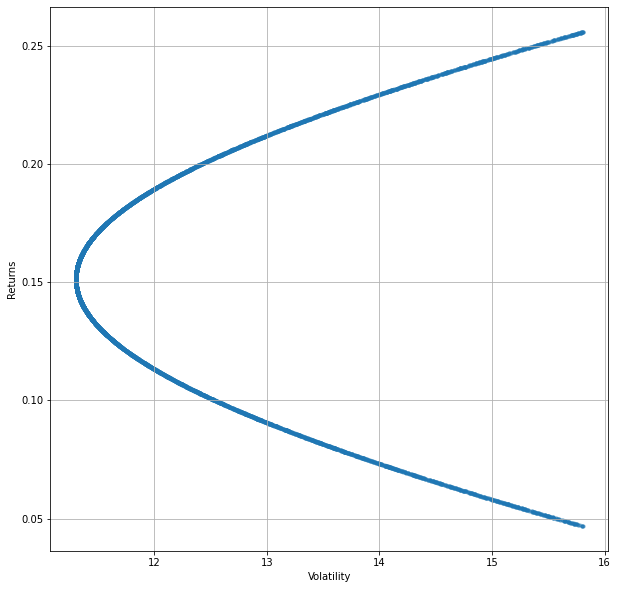

In [48]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [49]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.151461
Volatility     11.303617
AMZN weight     0.500015
GLD weight      0.499985
Name: 8346, dtype: float64

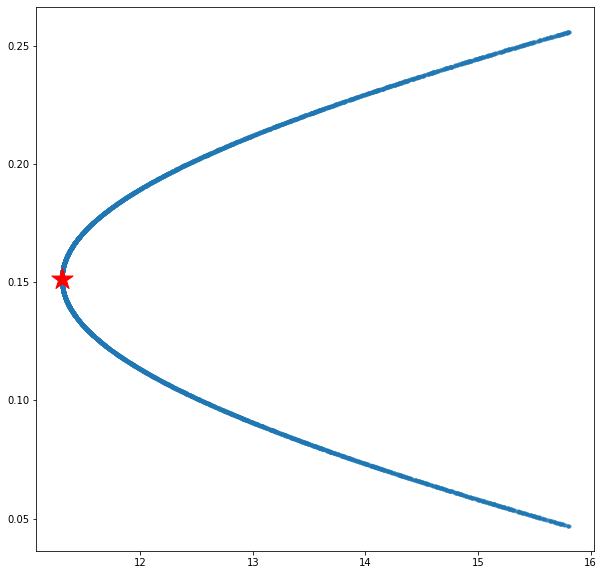

In [50]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [51]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.232498
Volatility     14.175982
AMZN weight     0.886901
GLD weight      0.113099
Name: 6830, dtype: float64

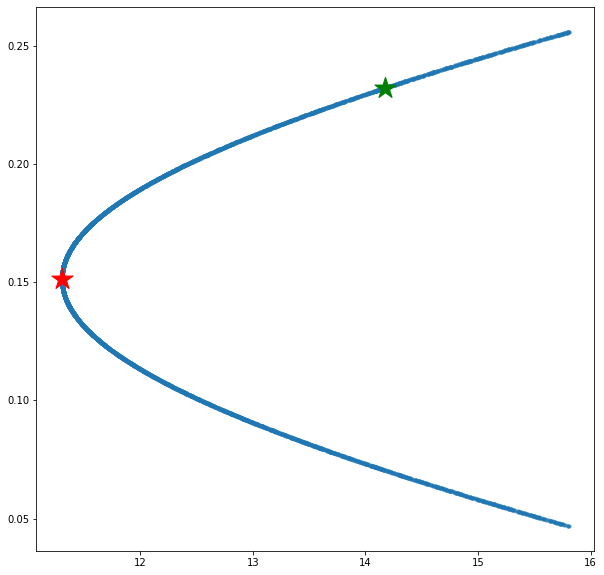

In [52]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## Q3-
 ### For the dataset that includes CO2 emissions from each energy resource starting January 1973 to July 2016. Answer the following

1.	Check the stationary using ADF test and autocorrelation plot.
2.	Forecast the target variable prediction using a suitable type of model.
3.	Evaluate the different types of error residues to check fitness of good of the model.
4.	Forecast the predictions for next 10 years on target variable.

In [113]:
data=pd.read_csv('co2.csv')
data.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [114]:
data.Value = pd.to_numeric(data.Value, errors='coerce')
data.YYYYMM = pd.to_datetime(data.YYYYMM, format='%Y%m', errors='coerce')
data = data.dropna()

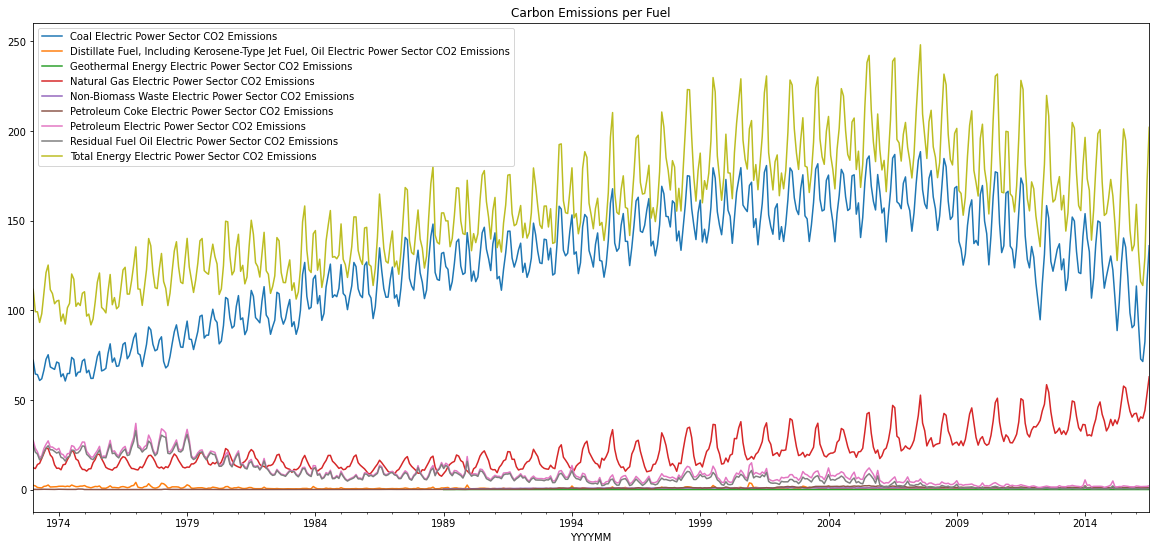

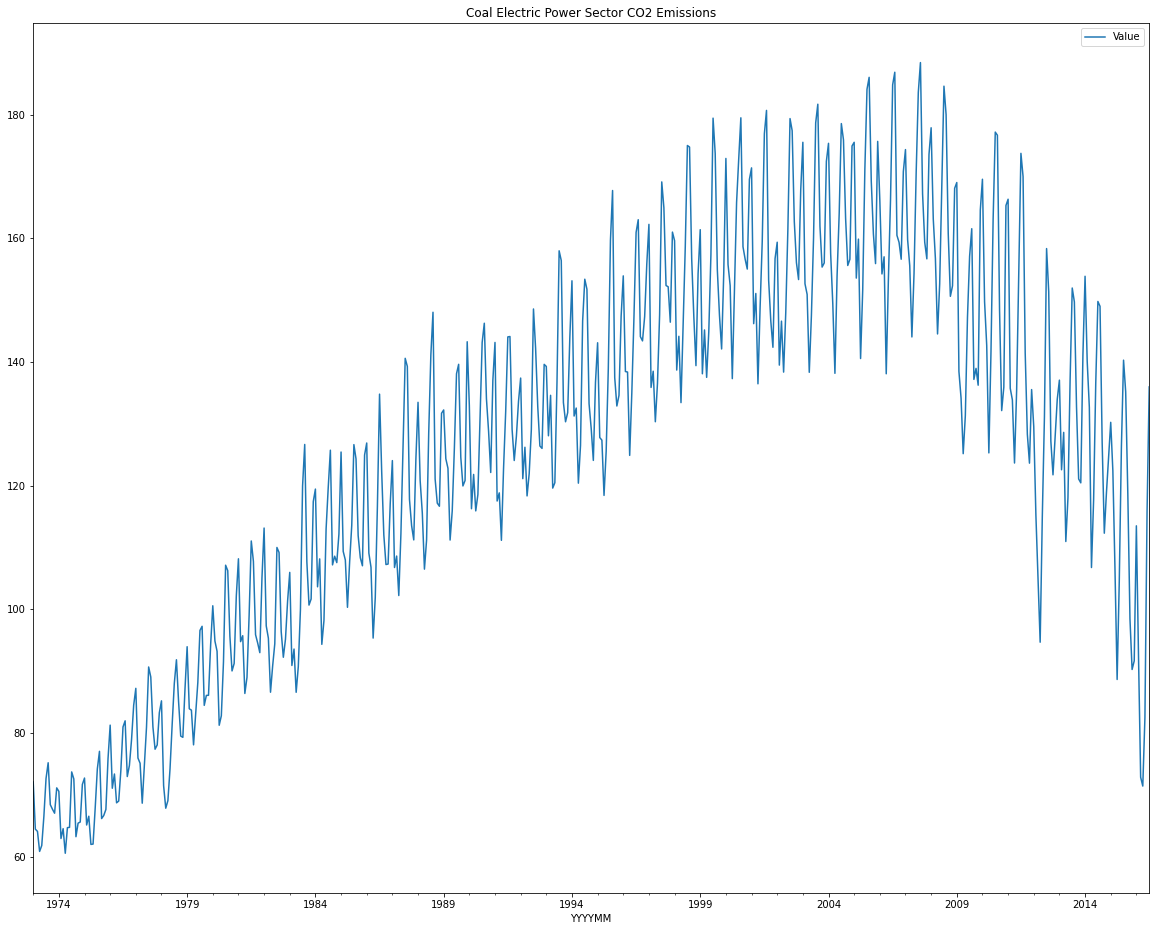

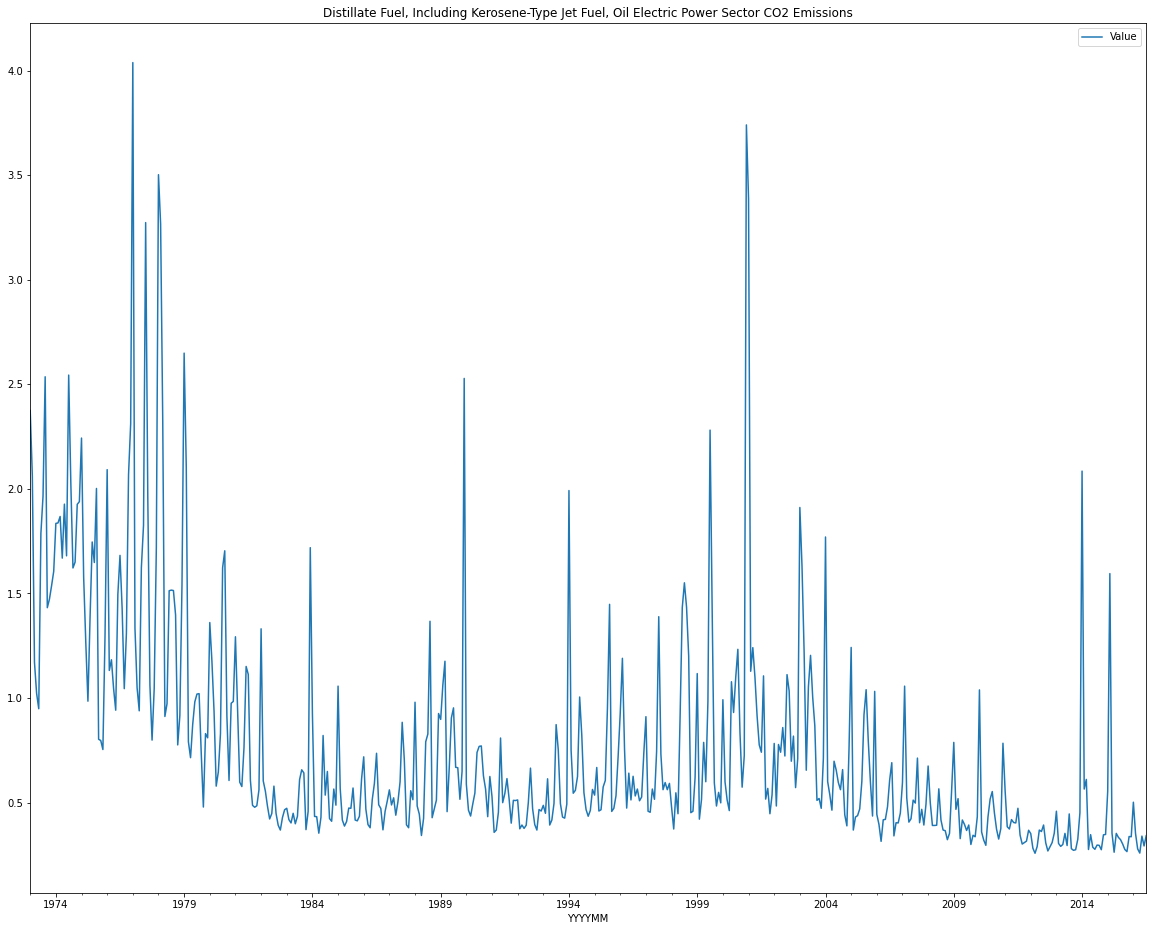

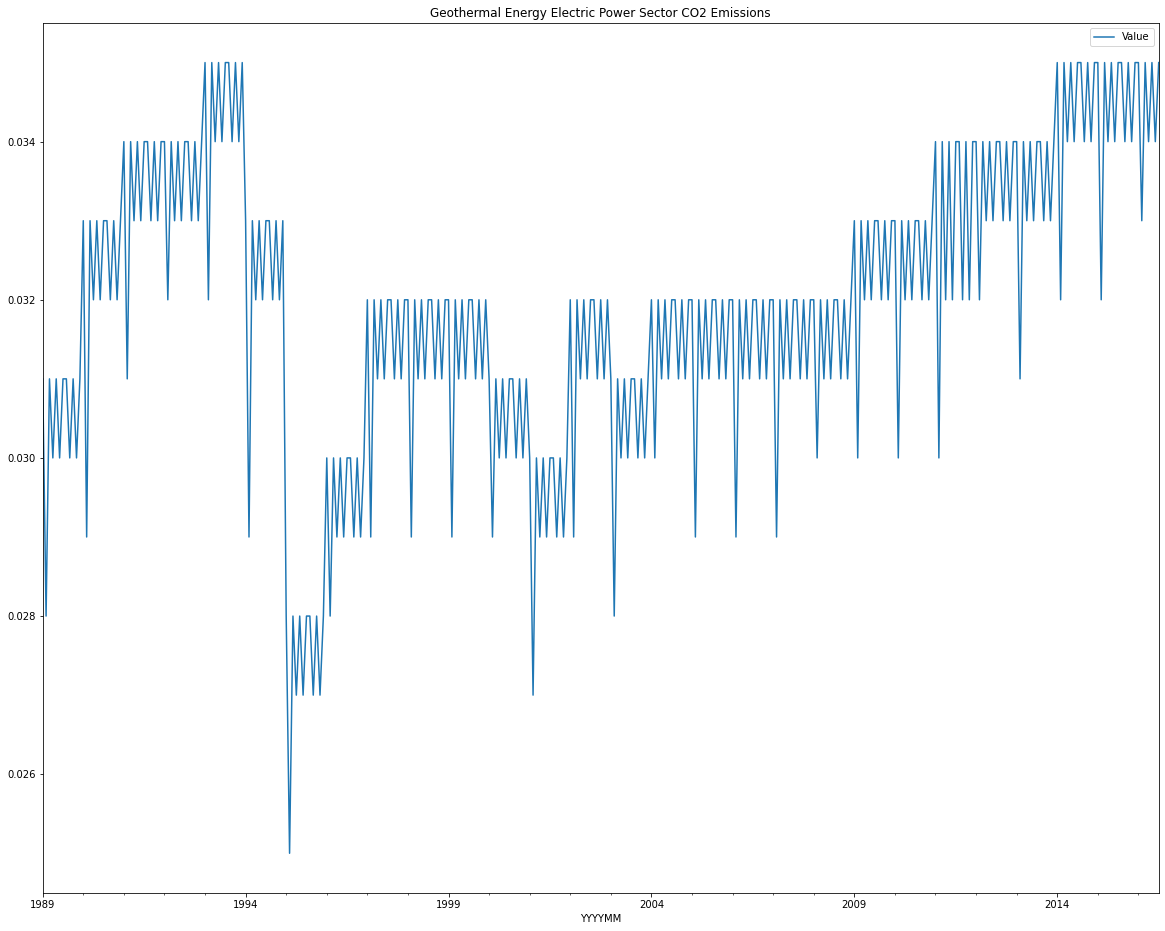

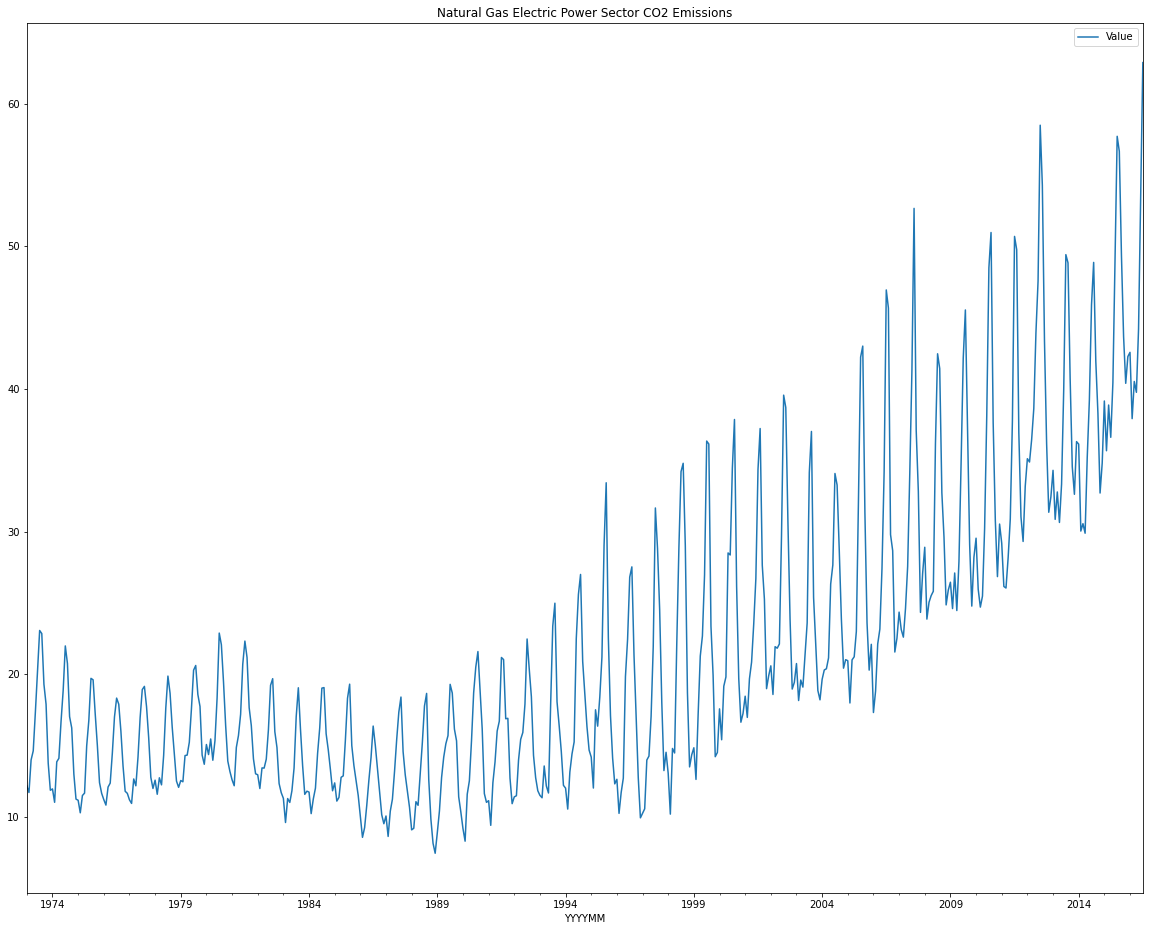

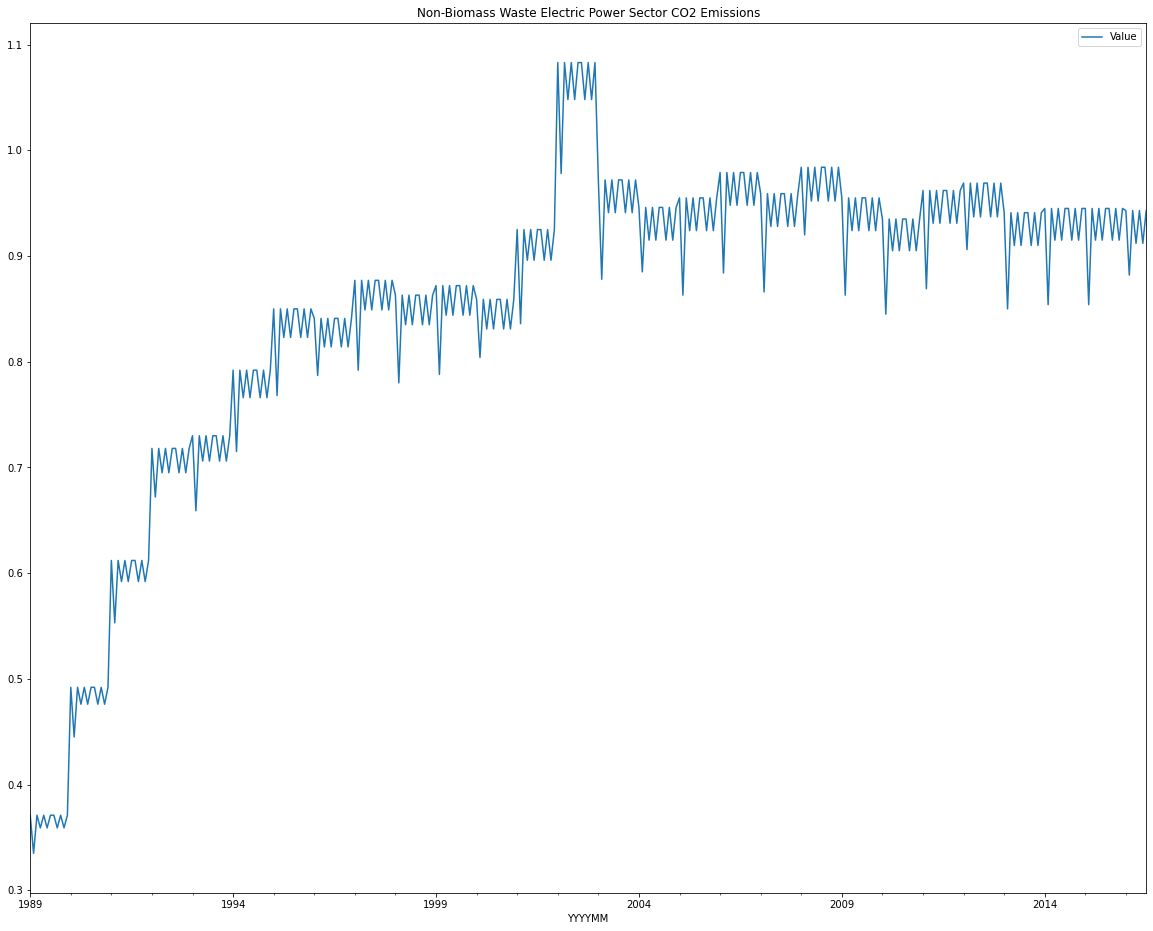

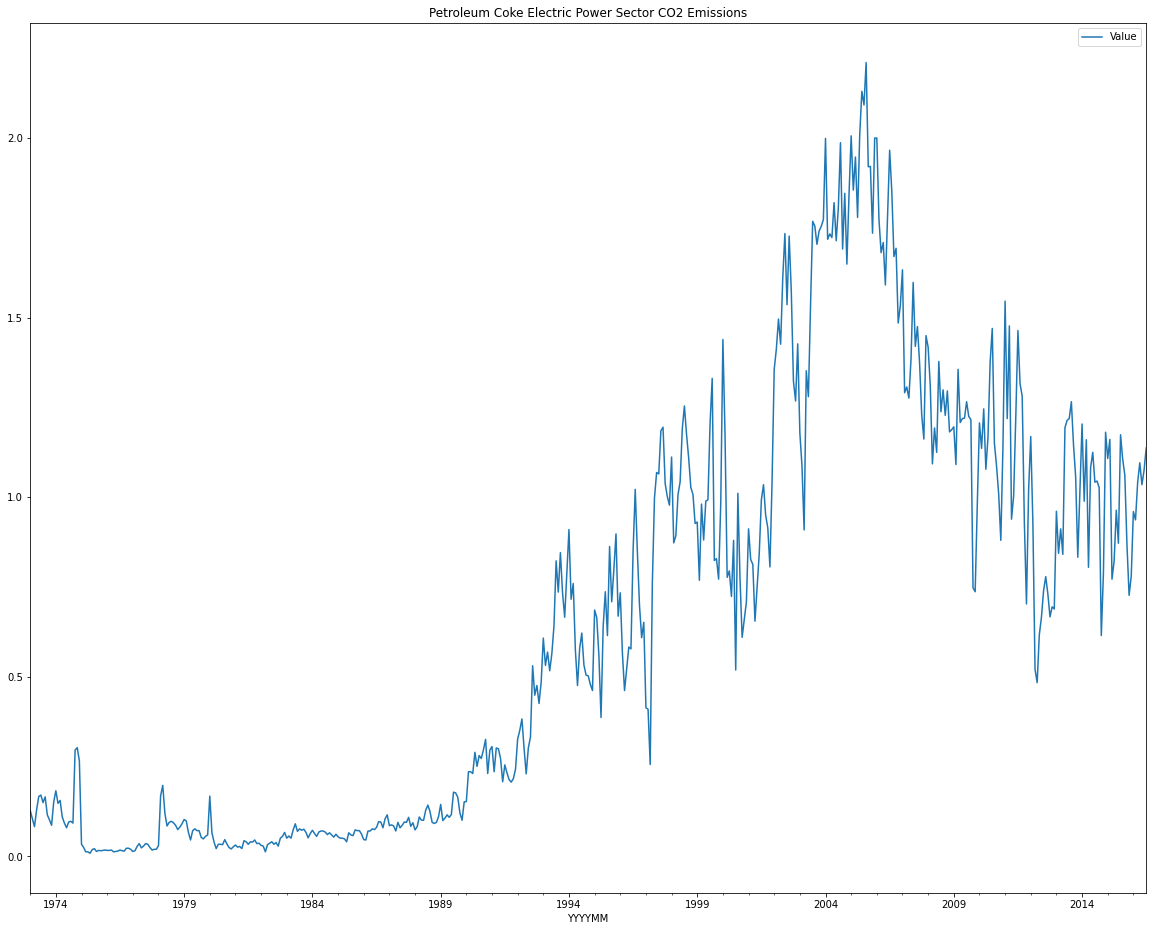

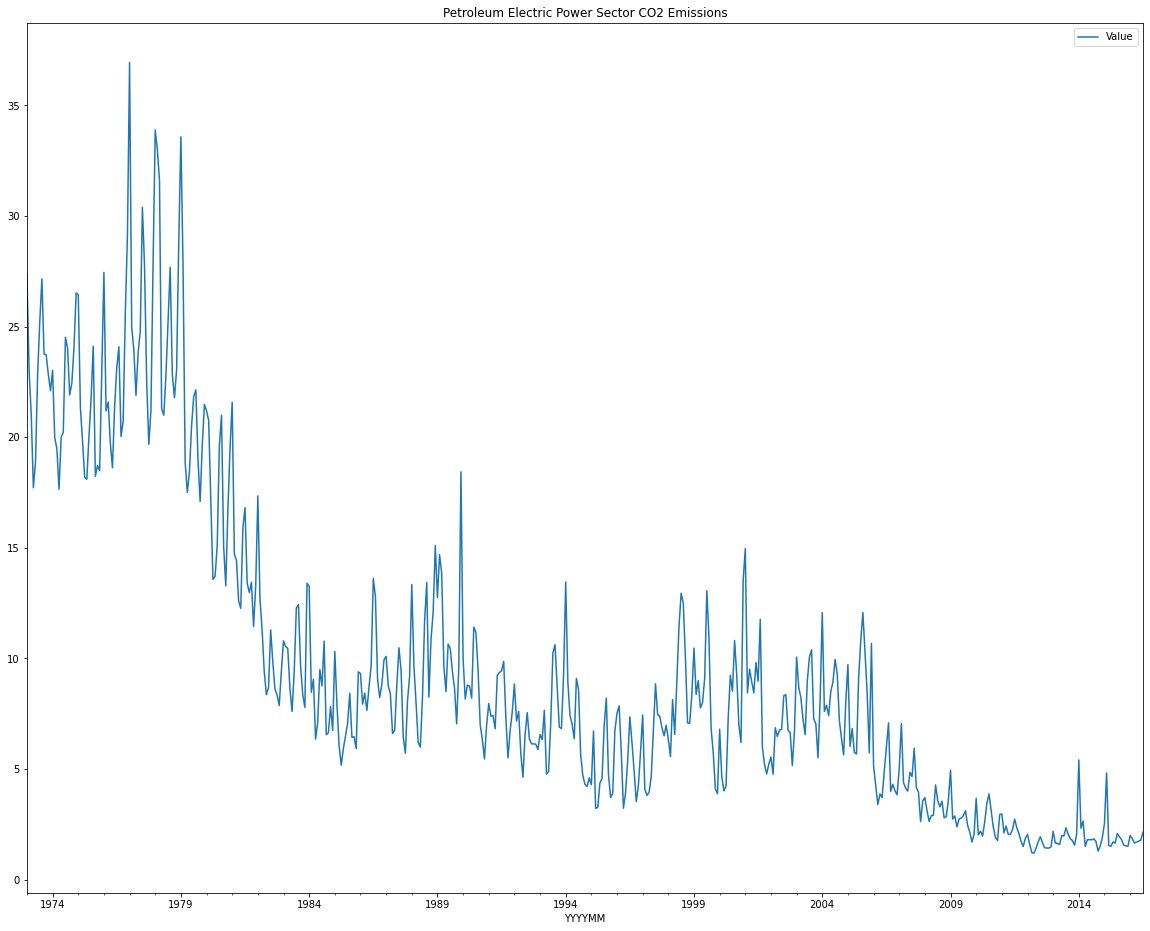

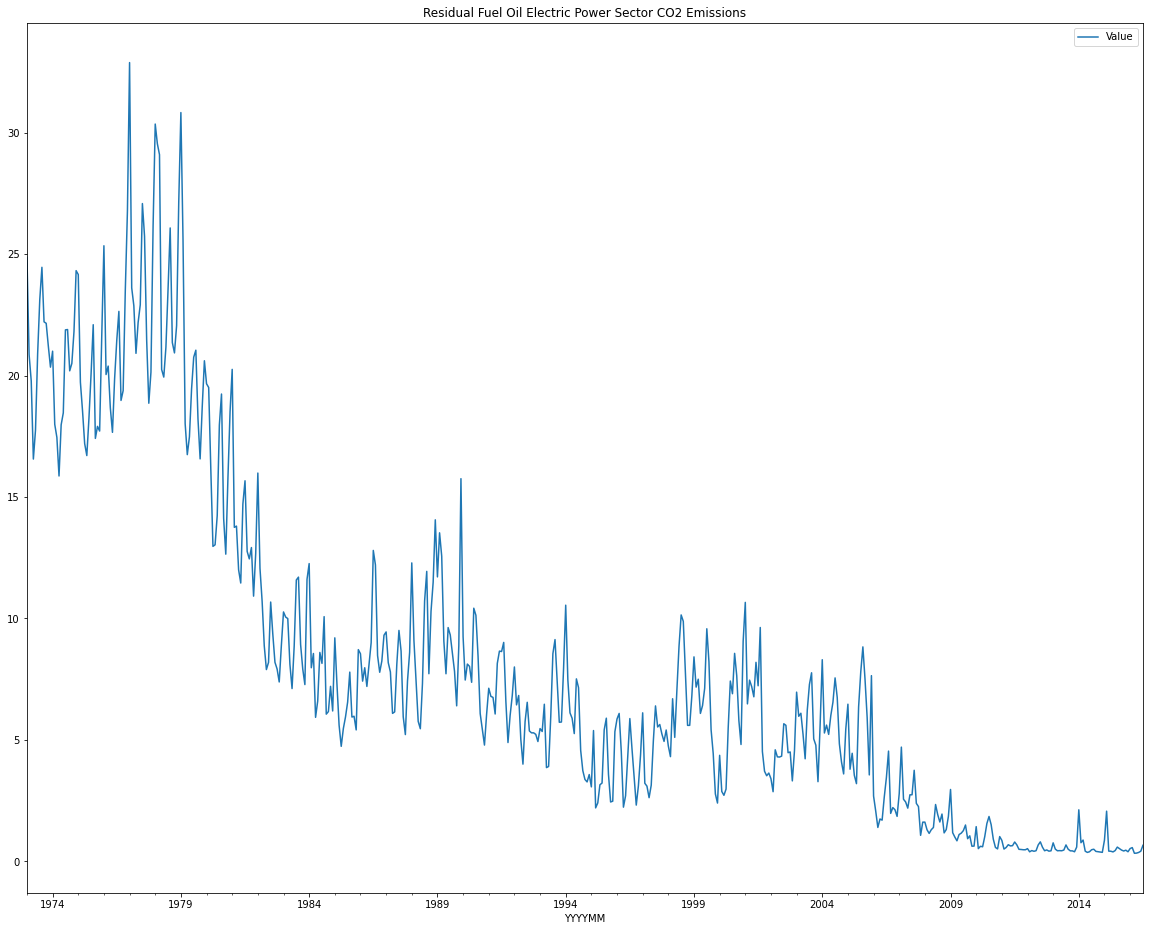

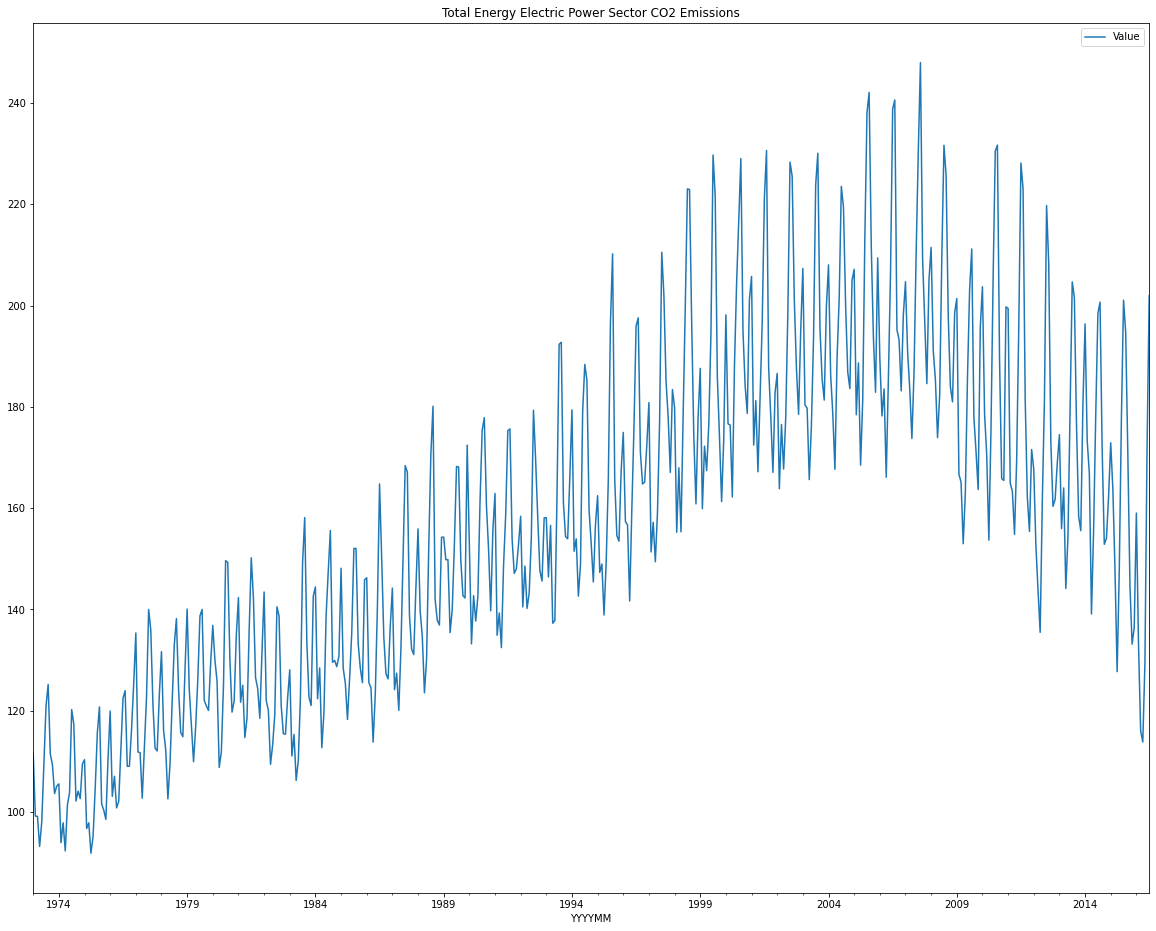

In [115]:
fuels = data.groupby('Description')
fig, ax = plt.subplots(figsize=(20,9))
for desc, group in fuels:
    group.plot(x='YYYYMM', y='Value', label=desc, ax=ax, title='Carbon Emissions per Fuel')
    group.plot(x='YYYYMM', y='Value', title=desc)

In [117]:
CO2_per_source = data.groupby('Description')['Value'].sum().sort_values()

In [118]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [119]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

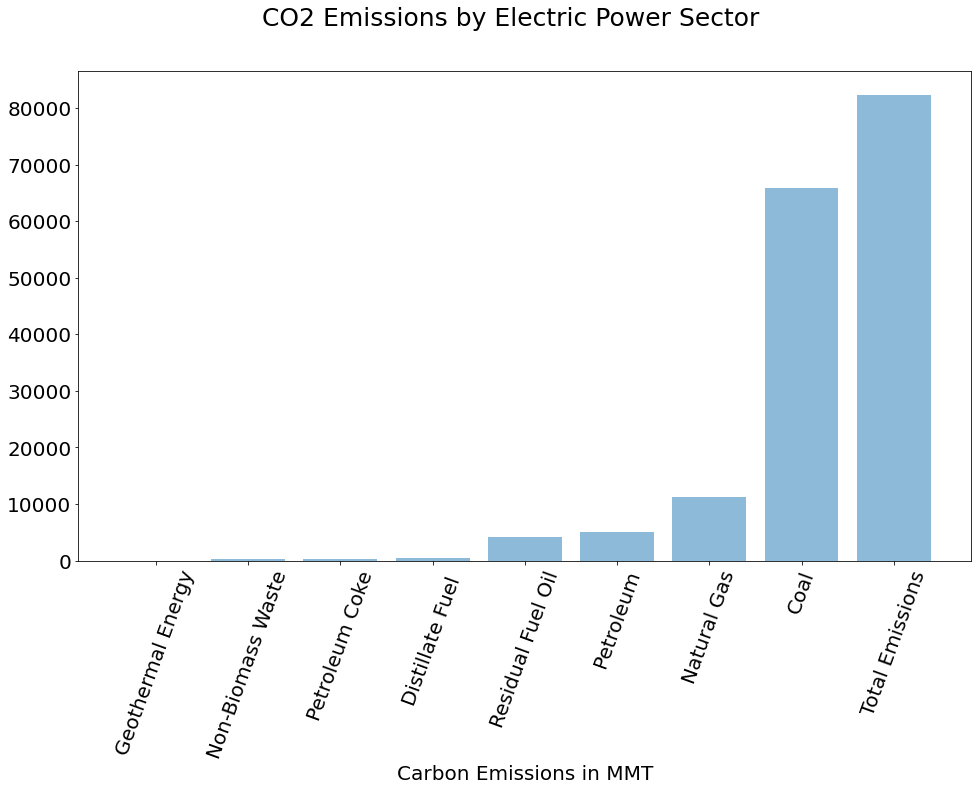

In [120]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [122]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [123]:
# ADF test

def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [124]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [132]:
Emissions = data.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

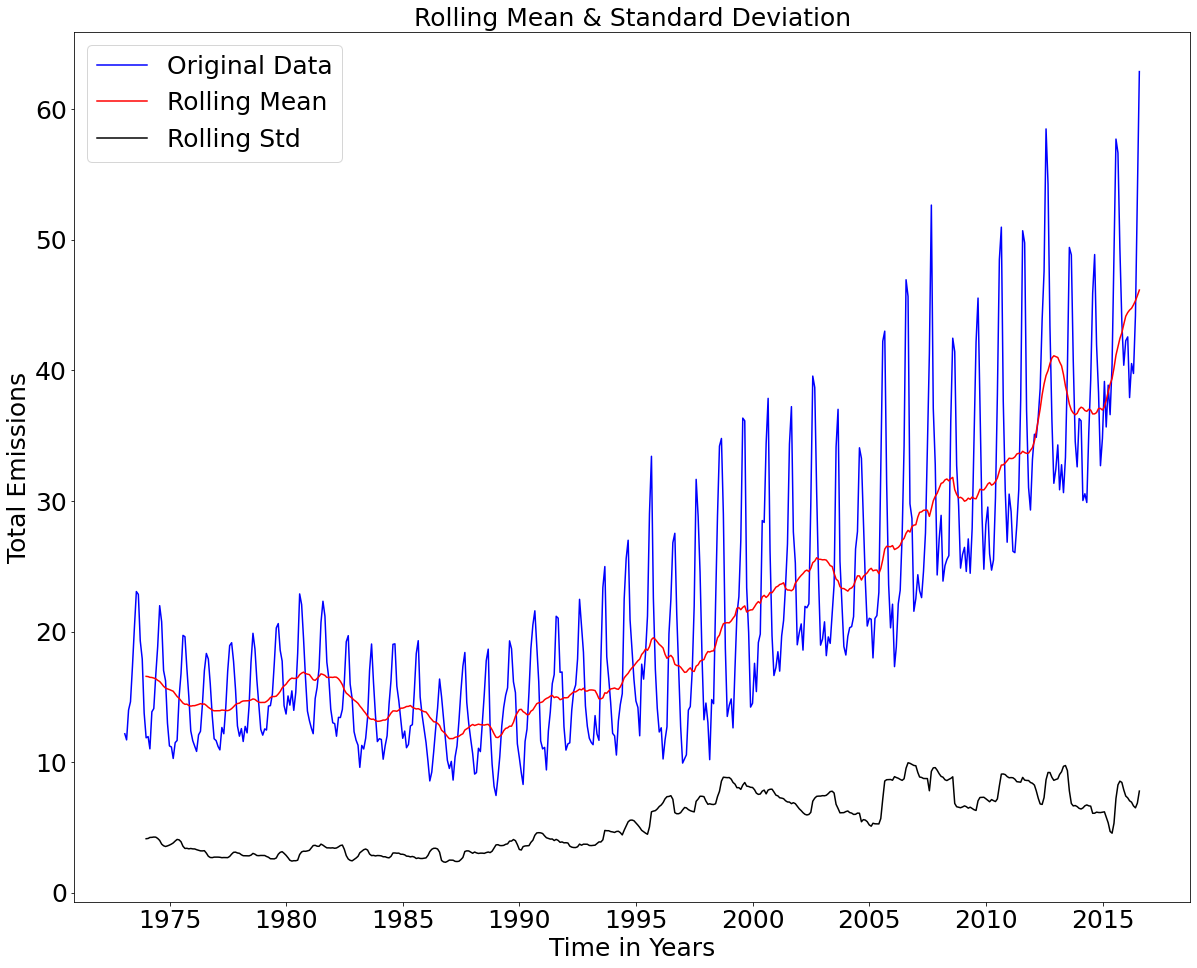

In [133]:
TestStationaryPlot(mte)

In [134]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Not stationary. Transform into one.

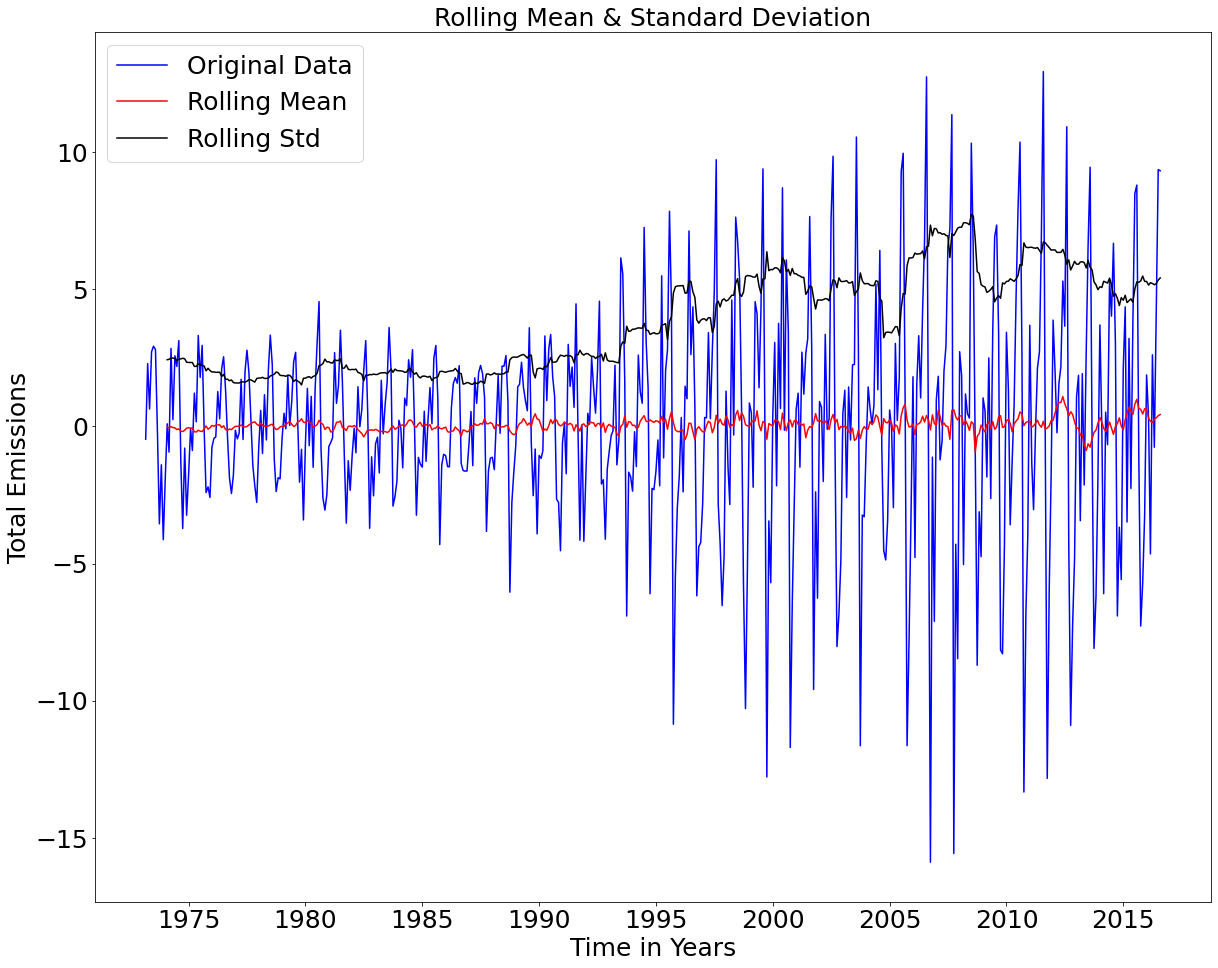

In [135]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [136]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


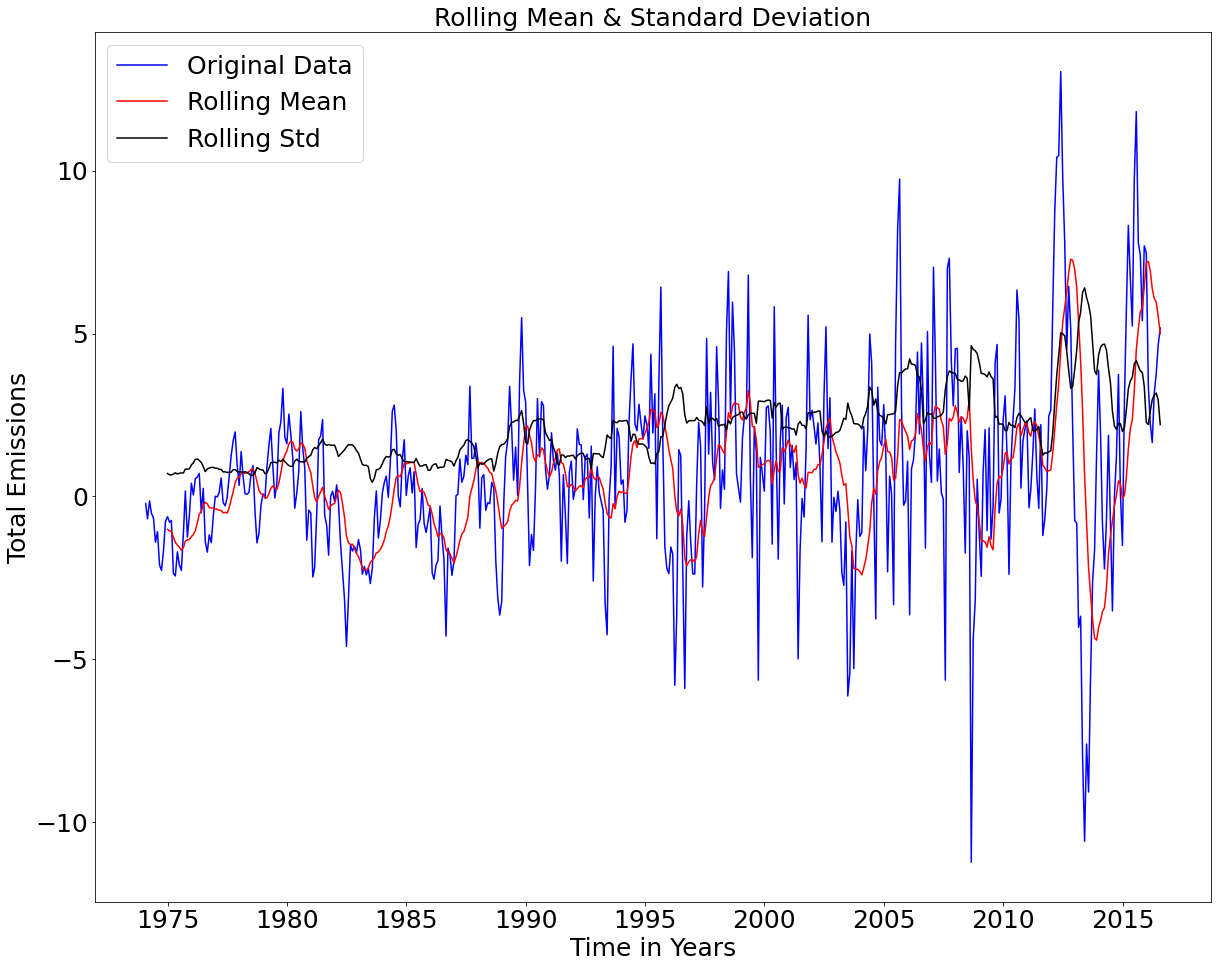

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [137]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

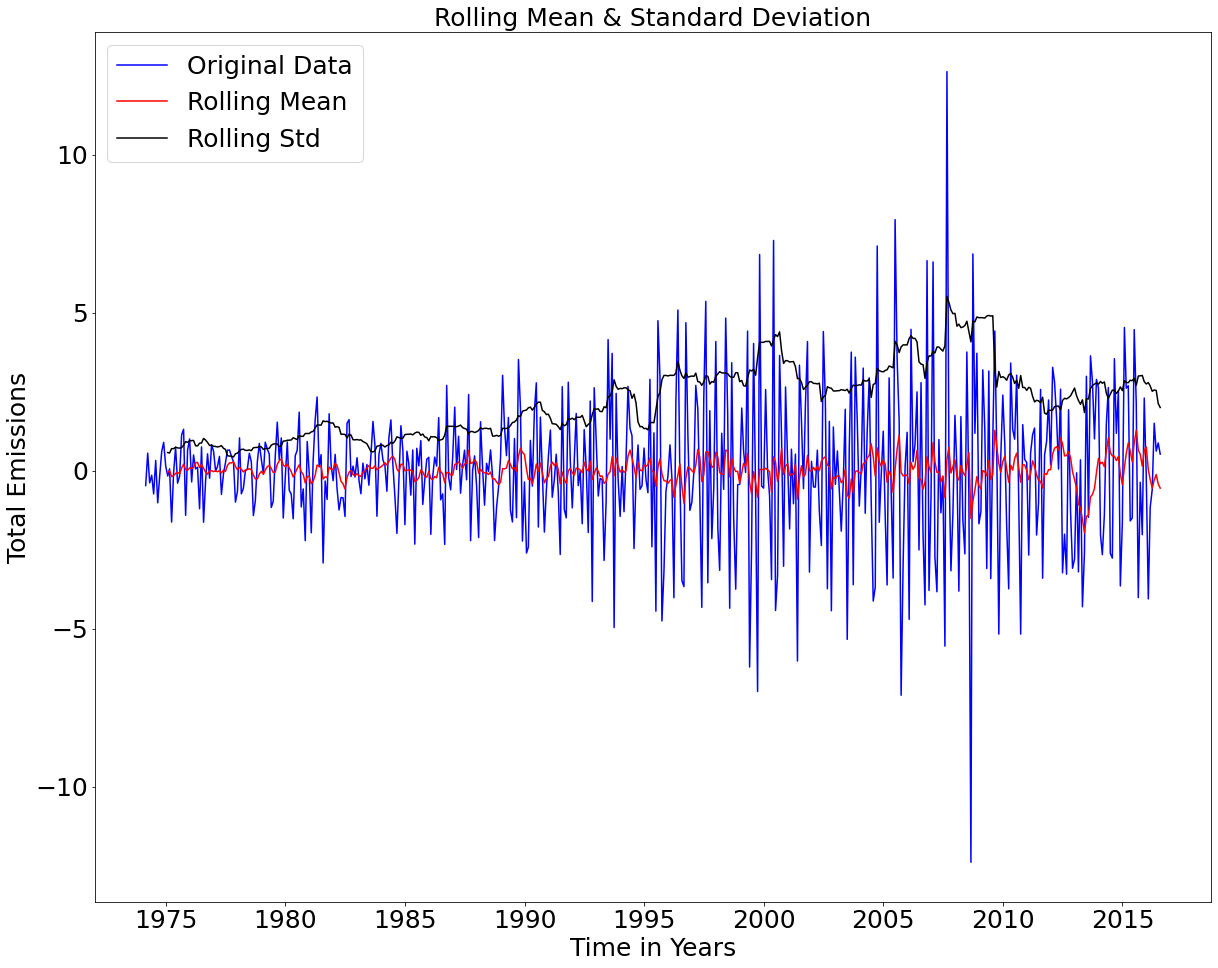

In [138]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [139]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Auto Correlation Function

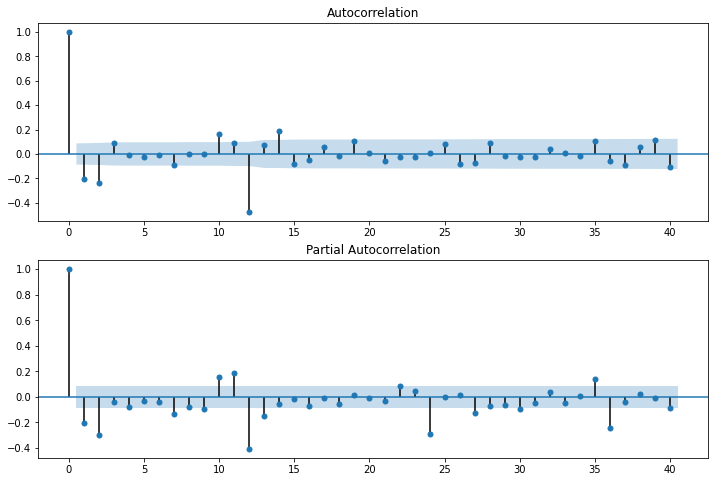

In [140]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [142]:
import itertools
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [143]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [144]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sat, 14 Jan 2023   AIC                           2003.553
Time:                                                     17:22:38   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

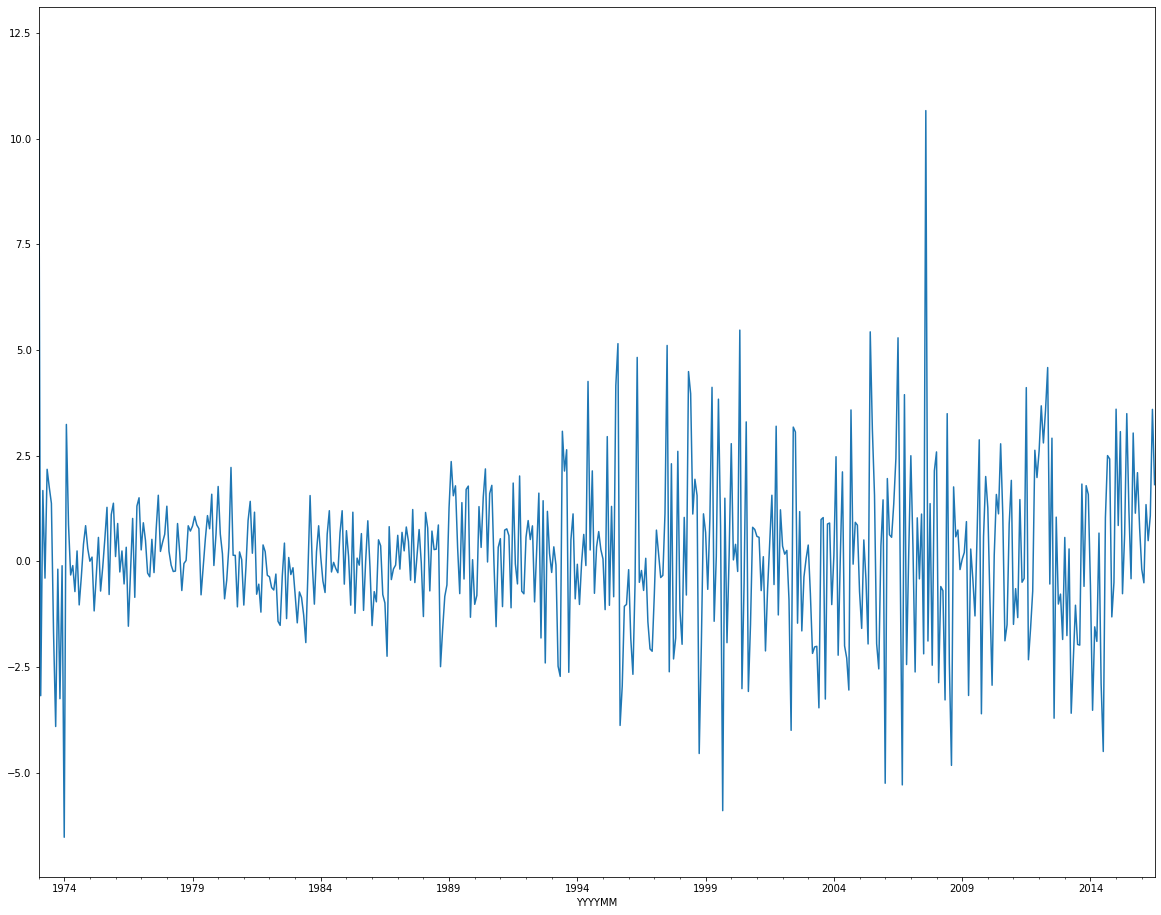

In [145]:
results.resid.plot()

In [146]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528430
25%       -0.791260
50%        0.126976
75%        1.040645
max       12.175000
dtype: float64


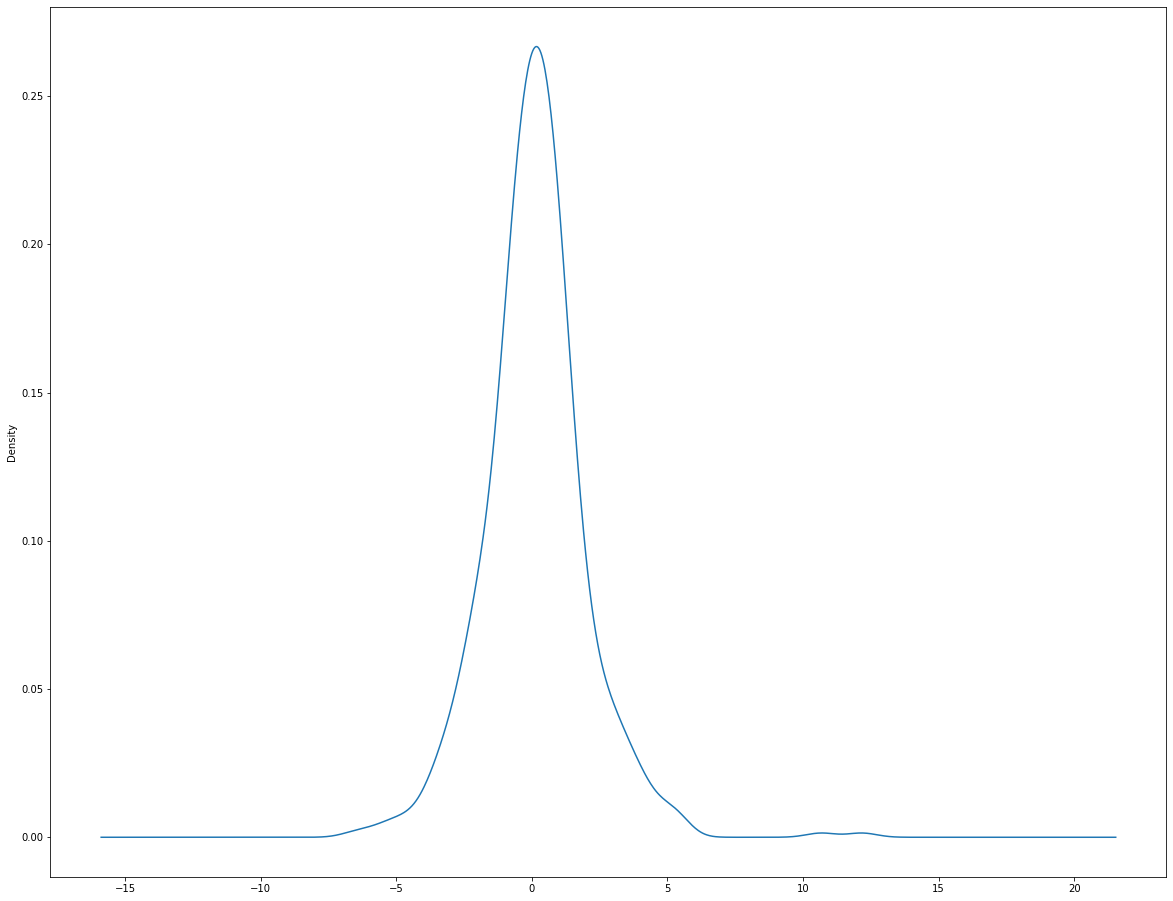

In [147]:
results.resid.plot(kind='kde')

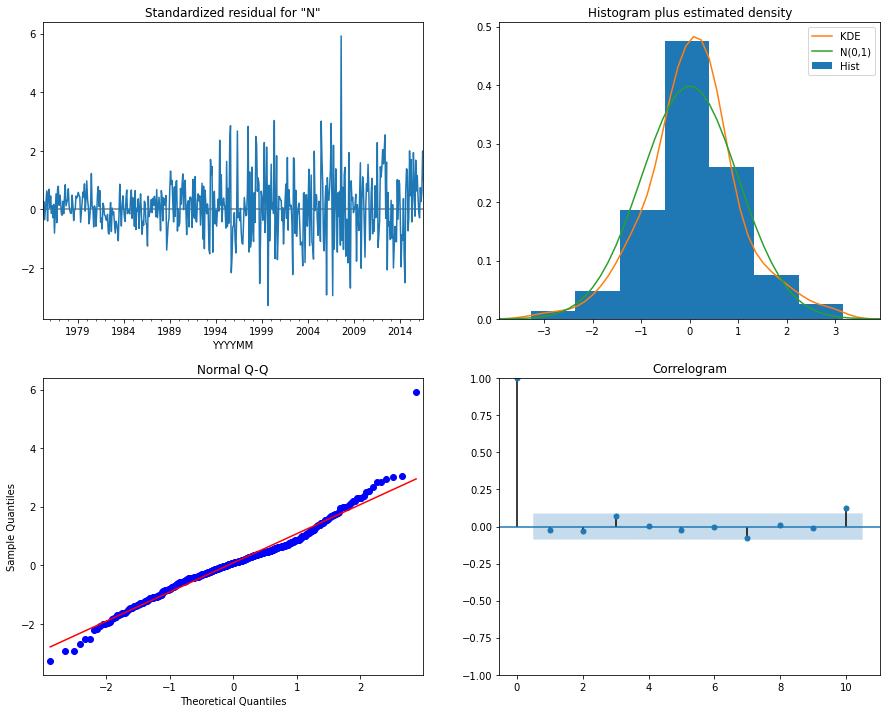

In [148]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Validating

In [149]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2013-01-31                                          30.203843       
2013-02-28                                          29.088387       
2013-03-31                                          28.958993       
2013-04-30                                          30.708079       
2013-05-31                                          32.104086       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2013-01-31                                          37.257332      
2013-02-28                                          36.141876      
2013-03-31                                          36.012482      
2013-04-30                                          37.761568      
2013-05-31                                          39.157575

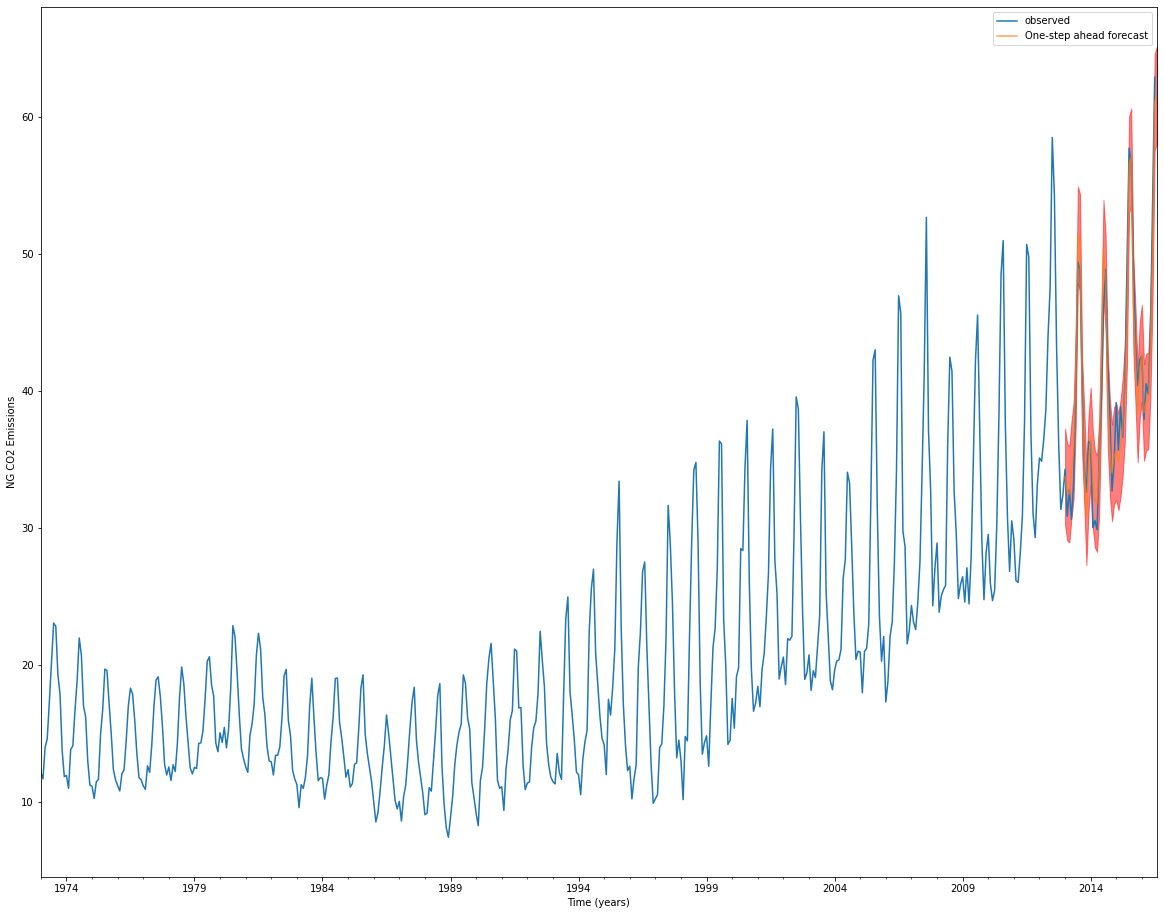

In [150]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [151]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [152]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [153]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


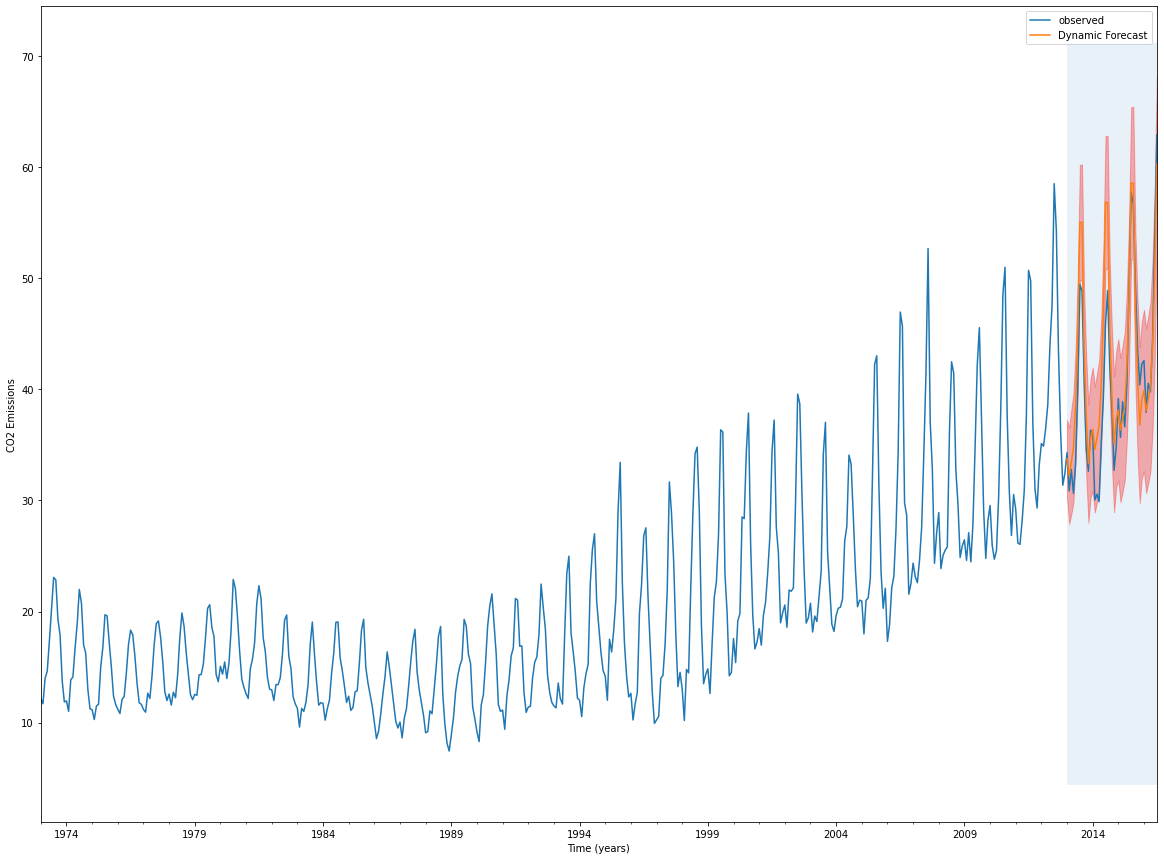

In [154]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [155]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


In [156]:
#Forecasting 120 months in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2016-08-31                                          58.062562       
2016-09-30                                          47.316620       
2016-10-31                                          40.736082       
2016-11-30                                          36.175937       
2016-12-31                                          38.095127       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2016-08-31                                          65.116051      
2016-09-30                                          55.987497      
2016-10-31                                          50.163098      
2016-11-30                                          46.010293      
2016-12-31                                          48.172706

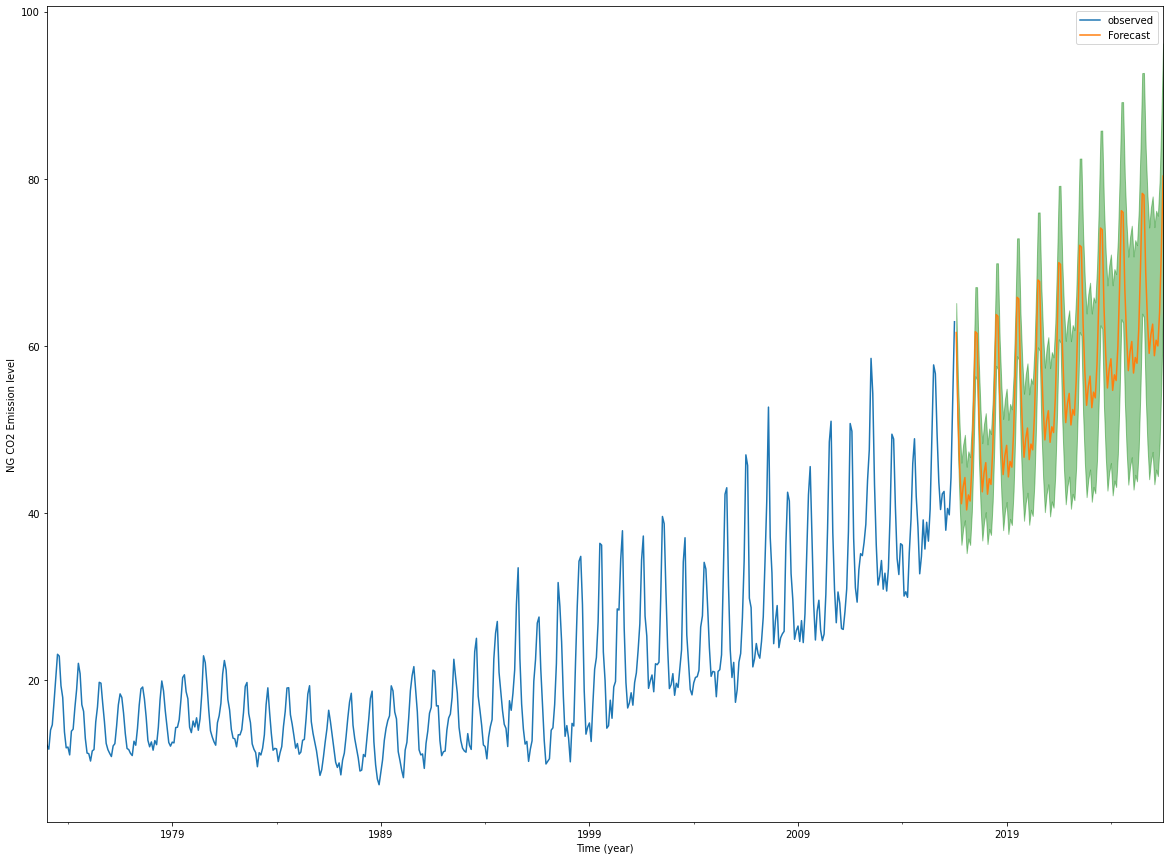

In [157]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()